In [1]:
from HTMLParser import HTMLParser # Python 2
import pandas as pd
%matplotlib inline

In [2]:
# Source https://gist.github.com/ckoehn/779847
class BookmarkParser(HTMLParser):
    """
    Parses a delicious.com bookmark file and transforms it into a list of 
    dictionaries.
       
    Usage:
    b = BookmarkParser()
    b.feed(open('delicious.htm').read())
    b.close()
    print b.bookmarks
    
    Output:
    [{'tags': ['flash', 'actionscript', 'blog'], 
    'add_date': '1204034881', 
    'title': 'blog.je2050.de - blog and database of joa ebert', 
    'private': False, 
    'note': '', 
    'href': 'http://blog.je2050.de/'}, ...]
    """
    
    #----------------------------------------------------------------------
    def reset(self):
        HTMLParser.reset(self)
        self.bookmarks = []
        self.last_bookmark = {}
        
                
    #----------------------------------------------------------------------
    def handle_starttag(self, tag, attrs):
        if tag == 'a':
            bookmark = {}        
            bookmark['title'] = u''
            bookmark['note'] = u''
            
            for k, v in attrs:
                if k == 'href':
                    bookmark['href'] = v
                elif k == 'add_date':
                    bookmark['add_date'] = v
                elif k == 'private':
                    bookmark['private'] = "1" in v
                elif k == 'tags':
                    bookmark['tags'] = v
                
            self.bookmarks.append(bookmark)
            self.last_bookmark = bookmark
    
        
    #----------------------------------------------------------------------       
    def handle_data(self, data):
        if self.lasttag == 'a' and self.last_bookmark['title'] == '':
            self.last_bookmark['title'] = str(data).rstrip()
            
        if self.lasttag == 'dd' and self.last_bookmark['note'] == '':
            self.last_bookmark['note'] = str(data).rstrip()


In [3]:
# Download delicious.html from https://export.delicious.com/settings/bookmarks/export
# Parses a delicious.com bookmark file
update_data = False
if update_data:
    b = BookmarkParser()
    with open('delicious.html', 'r') as data_file:
        b.feed(data_file.read())

    # Store in pandas DataFrame and export to csv
    df = pd.DataFrame(b.bookmarks)
    df.to_csv('delicious.csv')

In [4]:
# Read data from csv file
df = pd.read_csv('delicious.csv')

In [5]:
# Set index from add_date column in unix datetime
df['Date'] = pd.to_datetime(df.add_date, unit='s')
df.set_index('Date', inplace=True)

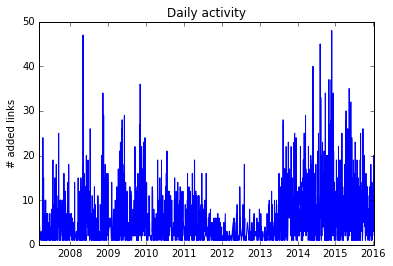

In [6]:
# Daily activity plot
ax = df.title.groupby(df.index.date).count().plot(title="Daily activity",style='-b')
ax.set_ylabel("# added links")
#df.title.groupby(pd.TimeGrouper("D")).count().plot(figsize=[20,10]) #Other way

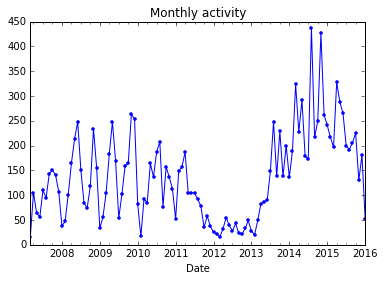

In [7]:
# Monthly activity plot
df.title.groupby(pd.TimeGrouper("M")).count().plot(title="Monthly activity", style='-b.')

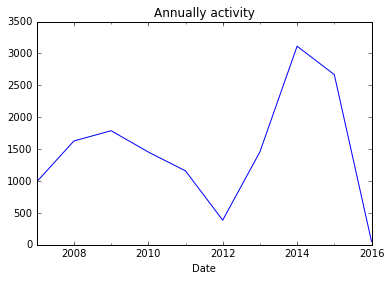

In [8]:
# Annually activity plot
df.title.groupby(pd.TimeGrouper("A")).count().plot(title="Annually activity")

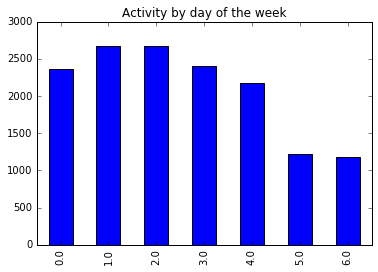

In [9]:
# Activity by day of the week plot
df.title.groupby(df.index.dayofweek).count().plot(kind="bar", title="Activity by day of the week")

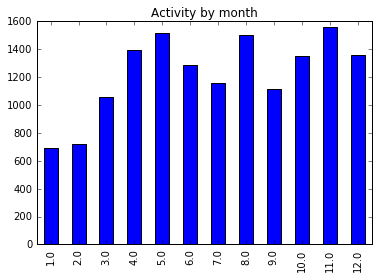

In [10]:
# Activity by month plot
df.title.groupby(df.index.month).count().plot(kind="bar", title="Activity by month")

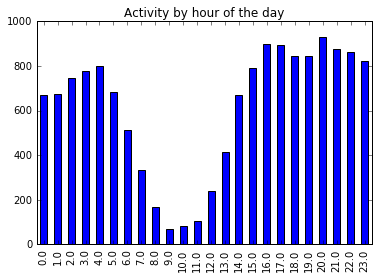

In [11]:
# Activity by hour of the day plot
df.title.groupby(df.index.hour).count().plot(kind="bar", title="Activity by hour of the day")

In [12]:
init = '2008-01-01' 
end = '2015-12-30'
# Maximum activity
print df.title.loc[init:end].groupby(pd.TimeGrouper("D")).count().max()
print df.title.loc[init:end].groupby(pd.TimeGrouper("M")).count().max()
print df.title.loc[init:end].groupby(pd.TimeGrouper("A")).count().max()

48
438
3114


In [13]:
# Mean activity
print df.title.loc[init:end].groupby(pd.TimeGrouper("D")).count().mean()
print df.title.loc[init:end].groupby(pd.TimeGrouper("M")).count().mean()
print df.title.loc[init:end].groupby(pd.TimeGrouper("A")).count().mean()

4.67386091127
142.114583333
1705.375


In [14]:
# Minimum activity
print df.title.loc[init:end].groupby(pd.TimeGrouper("D")).count().min()
print df.title.loc[init:end].groupby(pd.TimeGrouper("M")).count().min()
print df.title.loc[init:end].groupby(pd.TimeGrouper("A")).count().min()

0
16
386


In [15]:
df.tags.head()

Date
2016-01-05 21:00:07    file,format,data_format,accessibility,data_cur...
2016-01-05 20:45:48                                      pedología,suelo
2016-01-05 20:45:25                                        pedology,soil
2016-01-05 20:42:09                   edafología,suelo,plantas,agronomía
2016-01-05 03:08:55                                 tmp,jupyter,notebook
Name: tags, dtype: object

In [16]:
from collections import Counter
cnt = Counter()

for k,tags in df.tags.iteritems():
    for tag in str(tags).split(','):
        cnt[tag.decode('utf8')] += 1

In [17]:
for k,v in cnt.most_common(30):
    print k, v

python 1368
chile 822
opensource 564
programming 433
science 339
data 331
statistics 300
ubuntu 266
database 258
gis 197
reference 190
google 171
linux 163
finance 151
tools 150
blog 150
maps 148
educación 144
software 142
tutorial 142
opendata 141
gobierno_chile 140
datasets 136
economía 133
bcn 129
video 126
hydrology 125
development 123
ci69f 118
windows 117
